In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-09-06 00:30:25:887 +0100 [Thread-0] INFO  log - Logging initialized @769ms to org.eclipse.jetty.util.log.Slf4jLog
2023-09-06 00:30:25:908 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-09-06 00:30:25:952 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-09-06 00:30:25:971 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-09-06 00:30:25:971 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-09-06 00:30:25:972 +0100 [Thread-0] INFO  session - Scavenging every 600000ms
2023-09-06 00:30:25:976 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@52678880{/,null,AVAILABLE}
2023-09-06 00:30:25:991 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@7de1c3b7{/,null,AVAILABLE}
2023-09-06 00:30:25:995 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@22b95

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

In [ ]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters for
// the Public-Key (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
// (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class DilithiumEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q = 8380417;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q_inv = 58728449;
    
    // Definition of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int compression_asymmetric_keys_factor_d = 13;
    
    // Definition of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_pseudo_random_seed_rho_bytes = 32;
    
    // Definition of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_collision_resistant_hashing_bytes = 64;
    
    // Definition of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_pseudo_random_key_k_bytes = 32;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_result_solution_tr_bytes = 64;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_0_bytes = 416;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_1_bytes = 320;


    
    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    
    // Definition of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int security_parameters_mode;
    
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_hint_h_polynomial_vector_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_potential_signature_z_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_w_1_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_secret_key_range_eta_bytes;
    
    
    // Definition of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_k;
    
    // Definition of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_l;
    
    // Definition of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_eta;
    
    // Definition of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_tau;
    
    // Definition of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_beta;

    // Definition of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_1;

    // Definition of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_2;

    // Definition of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private final int param_omega;
    

    // Definition of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_public_key_bytes;

    // Definition of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param security_parameters_mode: The security parameters mode
    //                                     used for the CRYSTALS-Dilithium
    //                                     Public-Key Digital Signature Scheme.
    public DilithiumEngineParams( int security_parameters_mode ) {
    
        // Setting of the security parameters mode
        // used for the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        this.security_parameters_mode = security_parameters_mode;
        
        // Setting a switch-case code block for all the possible values
        // for the security parameters mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        switch( this.security_parameters_mode ) {
            
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 2.
            case 2:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 4;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 4;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 39;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁷ or 1 << 17).
                this.param_gamma_1 = ( 1 << 17 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 88 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 88 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 80;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 576;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 192;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 3.
            case 3:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 6;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 5;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 4;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 49;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 55;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 128;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 5.
            case 5:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 8;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 7;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 60;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 75;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;
                        
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding
                // an invalid value for the security parameters mode used
                // for the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                throw new IllegalArgumentException("Error: Mode #" + this.security_parameters_mode + " " +
                                                   "is not supported for CRYSTALS-Dilithium (Asymmetric) " +
                                                   "Public-Key Digital Signature Scheme!");
        
        }
            
        // Setting of the number of bytes
        // to be used for the computation of
        // the packed hint for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.num_packed_hint_h_polynomial_vector_bytes = 
                ( this.param_omega + this.param_k );

        // Setting of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_public_key_bytes = 
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_k * this.num_target_solution_t_1_bytes ) );

        // Setting of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_secret_key_bytes =
                ( ( 3 * this.num_pseudo_random_seed_rho_bytes ) +
                  ( this.param_l * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_target_solution_t_0_bytes ) );

        // Setting of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_cryptographic_signature_package_sigma_bytes =
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_l * this.num_packed_polynomial_potential_signature_z_bytes ) +
                    this.num_packed_hint_h_polynomial_vector_bytes );
        
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.

    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_n() {
    
        // Return of the maximum degree n of
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_n;
        
    }

    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q() {
    
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q;
    
    }

    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q_inv() {
    
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q_inv;
    
    }

    // Method to obtain the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_compression_asymmetric_keys_factor_d() {
    
        // Return of the compression factor d to
        // reduce/compress the size (dropped bits) of
        // the asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.compression_asymmetric_keys_factor_d;
    
    }

    // Method to obtain the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bytes() {
    
        // Return of the number of bytes
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_pseudo_random_seed_rho_bytes;
    
    }

    // Method to obtain the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bits() {
    
        // Return of the number of bits
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_pseudo_random_seed_rho_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

    // Method to obtain the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_collision_resistant_hashing_bytes;
    
    }

    // Method to obtain the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bits() {
    
        // Return of the number of
        // bits to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_collision_resistant_hashing_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_pseudo_random_key_k_bytes;
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bits() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_pseudo_random_key_k_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the final polynomial target result tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_result_solution_tr_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bits() {
    
        // Return of the number of bits
        // to be used for the computation of the final
        // polynomial target result solution tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_result_solution_tr_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_0_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_0_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_1_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_1_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_security_parameters_mode() {
    
        // Return of the security parameters
        // mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.security_parameters_mode;
        
    }

    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bytes() {
        
        // Return of the number of bytes
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_hint_h_polynomial_vector_bytes;

    }

    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bits() {
        
        // Return of the number of bits
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_hint_h_polynomial_vector_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_potential_signature_z_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_potential_signature_z_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_w_1_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_w_1_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bytes() {
        
        // Return of the number of bytes to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_secret_key_range_eta_bytes;
    
    }

    // Method to obtain the number of bits to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bits() {
        
        // Return of the number of bits to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_secret_key_range_eta_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the 1st coordinate k
    // for the input number k of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_k() {
    
        // Return of the 1st coordinate k for
        // the input number k of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_k;
    
    }
    
    // Method to obtain the 2nd coordinate l
    // for the output number l of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_l() {
    
        // Return of the 2nd coordinate l for
        // the output number l of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_l;
    
    }
    
    // Method to obtain the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_eta() {
    
        // Return of the secret key range η of
        // the pseudo-random samples to be used as
        // the secret vectors/arrays s₁ and s₂ to
        // compute the initial polynomial target
        // vector/array t for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_eta;
        
    }

    // Method to obtain the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_tau() {
    
        // Return of the number τ of ± 1's
        // (bits set as 1) in the presented
        // sampled and transmitted challenge c
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_tau;
        
    }
    
    // Method to obtain the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_beta() {
    
        // Return of the maximum possible
        // polynomial coefficient β of the mathematical
        // product c⋅sᵢ vector/array, denoted as well
        // by the mathematical product denoted as τ⋅η from
        // the parameters used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_beta;
        
    }
    
    // Method to obtain the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_1() {
    
        // Return of the coefficient range γ₁ of
        // the expanded masking vector/array y computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_1;
        
    }
    
    // Method to obtain the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_2() {
    
        // Return of the low-order rounding
        // range γ₂ of the high-order packed polynomial
        // coefficients w₁ vector/array computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_2;
        
    }
    
    // Method to obtain the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_param_omega() {
    
        // Return of the maximum number ω of 1's in the hint h
        // given for the resolution of the challenge c vector/array of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.param_omega;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_public_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bits() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_secret_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bits() {
    
        // Return of the size, in terms of bits,
        // of the asymmetric private key Kₛ to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security
        // under CMA (Chosen Message Attack) property.
        return ( this.get_num_euf_cma_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bytes() {
    
        // Return of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bits() {
    
        // Return of the size, in terms of bits,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_cryptographic_signature_package_sigma_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

}


// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    // Setting of the array of the parameters modes
    // regarding the input number k of polynomials and
    // the output number l of polynomials per vector used in
    // the matrix A representing the lattice algebraic structure,
    // representing as well, the size factor (k,l) for that
    // same lattice algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security strength of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public final int[] engine_mode_parameters = {
        
        // 1) Parameter Mode 2 to build the 'Dilithium2' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        2,
        
        // 2) Parameters Mode 3 to build the 'Dilithium3' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        3,
        
        // 3) Parameters Mode 5 to build the 'Dilithium5' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_engine_mode_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return engine_mode_parameters[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to initialize the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required
        // to build the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's cryptographic engine.
        int dilithium_engine_mode_parameter = this.get_engine_mode_parameter();

        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.engine_parameters = 
            new DilithiumEngineParams( dilithium_engine_mode_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.engine_parameters;
        
    }
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_public_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_public_key_parameters().length;
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_from_public_key_parameters().length *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_pseudo_random_key_k_from_private_key_parameters().length;
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return ( this.get_pseudo_random_key_k_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bytes_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_result_solution_tr_from_private_key_parameters().length;
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bits_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_result_solution_tr_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_1_from_private_key_parameters().length;

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bits_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_2_from_private_key_parameters().length;

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bits_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_2_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_0_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_0_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPrivateKeyParameters get_private_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
    
        // Return of the payload of the private key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // private key of the digital signature scheme.
        return this.get_private_key_payload_from_parameters();
        
    }

}


// Setting of the number of parameter set mode choices for
// the generation of the asymmetric key pair to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
final short NUM_PARAMETERS_SET_MODE_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be
// analysed from the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
double[][] crystals_dilithium_digital_signature_schemes_key_generation_times = 
    new double[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, not considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
int[][][] crystals_dilithium_digital_signature_schemes_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (k = 2,3,4).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );


    // Retrieval of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters' Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    String crystals_dilithium_security_parameters_mode_name_and_description = 
        crystals_dilithium_digital_signature_scheme.get_security_parameters_mode_name_and_description();


    // Retrieval of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Specifications.
    DilithiumParameterSpec crystals_dilithium_security_parameters_specification =
        crystals_dilithium_digital_signature_scheme.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of
    // a possible execution of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println(" ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM " + 
                                     "PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_dilithium_security_parameters_mode_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_parameters();
    
    
    // Initialization of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    DilithiumEngineParams crystals_dilithium_digital_signature_scheme_engine_parameters = 
        crystals_dilithium_digital_signature_scheme.get_engine_parameters();

    
    // Retrieval of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int security_parameters_mode = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_security_parameters_mode();
    
    // Retrieval of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_k = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_k();
    
    // Retrieval of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_l = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_l();
    
    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_n = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_n();
    
    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q();
    
    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q_inv = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q_inv();
    
    // Retrieval of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int compression_asymmetric_keys_factor_d = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_compression_asymmetric_keys_factor_d();
    
    // Retrieval of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_eta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_eta();
    
    // Retrieval of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_tau = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_tau();
    
    // Retrieval of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_beta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_beta();
    

    // Retrieval of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_1 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_1();

    // Retrieval of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_2 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_2();

    // Retrieval of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int param_omega = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_omega();
    
    
    
    // Print of the string with the size of
    // the Security Parameter Set to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Security Parameter Set " + 
                        "(Mode = " + security_parameters_mode + ") to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "l = " + param_l + " | "
                                    + "n = " + param_n + " | " + "d = " + compression_asymmetric_keys_factor_d + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + "\n" +
                        "         " + "η = " + param_eta + " | " + "τ = " + param_tau + " | "
                                    + "β = " + param_beta + " | " + "ω = " + param_omega + " | "
                                    + "γ₁ = " + param_gamma_1 + " | " + "γ₂ = " + param_gamma_2 );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bytes();
    
    // Retrieval of the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bits();
    
    
    // Print of the string with the size of the (Pseudo) Random Seeds,
    // Collision-Resistant Hashes, and (Pseudo) Random Secrets/Keys,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and\n" +
                        "       (Pseudo) Random Secrets/Keys to be generated and used:\n" +
                        "       " + "- Size of a (Pseudo) Random Seed ρ: " 
                                  + num_pseudo_random_seed_rho_bytes  + " bytes | " + num_pseudo_random_seed_rho_bits + " bits\n" +
                        "       " + "- Size of a Collision-Resistant Hash ρ': " 
                                  + num_collision_resistant_hashing_bytes + " bytes | " + num_collision_resistant_hashing_bits + " bits\n" +
                        "       " + "- Size of a (Pseudo) Random Secret/Key K: " 
                                  + num_pseudo_random_key_k_bytes  + " bytes | " + num_pseudo_random_key_k_bits + " bits");

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bits();
    
    
    // Print of the string with the size of the target solutions vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the Target Solutions Vectors/Arrays to be generated and used:\n" +
                        "       " + "- Size of a Target Solution t₀: " 
                                  + num_target_solution_t_0_bytes + " bytes | " + num_target_solution_t_0_bits + " bits\n" +
                        "       " + "- Size of a Target Solution t₁: " 
                                  + num_target_solution_t_1_bytes + " bytes | " + num_target_solution_t_1_bits + " bits\n" +
                        "       " + "- Size of a Target Result Solution tr: " 
                                  + num_target_result_solution_tr_bytes + " bytes | " + num_target_result_solution_tr_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the generation of
    // the pair of asymmetric keys.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Key Generation:\n" +
                        "       " + "- Size of a Secret Key Range Packed Polynomial η: " 
                                  + num_packed_polynomial_secret_key_range_eta_bytes + " bytes | " + num_packed_polynomial_secret_key_range_eta_bits + " bits\n" +
                        "       " + "- Size of a High-Order Packed Polynomial Coefficients w₁: " 
                                  + num_packed_polynomial_w_1_bytes + " bytes | " + num_packed_polynomial_w_1_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bytes();

    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Signing Mechanism:\n" +
                        "       " + "- Size of a Hint Packed Polynomial h: " 
                                  + num_packed_hint_h_polynomial_vector_bytes + " bytes | " + num_packed_hint_h_polynomial_vector_bits + " bits\n" +
                        "       " + "- Size of a Potential Signature Packed Polynomial z: " 
                                  + num_packed_polynomial_potential_signature_z_bytes + " bytes | " + num_packed_polynomial_potential_signature_z_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bytes();
    
    // Retrieval of the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bits();

    // Retrieval of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bytes();

    // Retrieval of the size, in terms of bits, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bits();
    
    // Retrieval of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bytes();
    
    // Retrieval of the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bits();
    
    
    // Print of the string with the size of EUF-CMA,
    // (Existential UnForgeability under Chosen Message Attack)
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure,
    // as well as the resulting cryptographic signature produced.
    System.out.println( "     * Size of EUF-CMA (Existential UnForgeability under Chosen Message Attack)\n" +
                        "       Pair of Asymmetric Keys and Cryptographic Signature, to be used by\n" +
                        "       the internal Signing and Verifying procedures:\n" +
                        "       " + "- Size of an EUF-CMA Public Key Kₚ: " 
                                  + num_euf_cma_public_key_bytes + " bytes | " + num_euf_cma_public_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA (Secret) Private Key Kₛ: " 
                                  + num_euf_cma_secret_key_bytes + " bytes | " + num_euf_cma_secret_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA Cryptographic Signature Package σ: " 
                                  + num_euf_cma_cryptographic_signature_package_sigma_bytes + " bytes | " + num_euf_cma_cryptographic_signature_package_sigma_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set choice mode (Mode = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be
        // analysed from the current configured CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, measured in nanoseconds.
        crystals_dilithium_digital_signature_schemes_key_generation_times
            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );
    
    
    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_public_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_public_key_parameters_byte :
            target_solution_t_1_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_public_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ================================================" +
                             "================================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_private_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] pseudo_random_key_k_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string
    // representation in hexadecimal of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_key_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_key_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo)
            // random cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random
    // cryptographic key K, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, from the upper-case values of
    // the respective String Buffer.
    String[] pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_key_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int k_i = 0; k_i < pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars.length; k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_i != 0 ) && ( k_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the (pseudo) random cryptographic key K, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
            " K" + "[" + k_i + "]" + " = " + 
                    pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars[k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_key_k_from_private_key_parameters_binary_string = "K = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_key_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_key_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ K (uniformly (pseudo) random cryptographic key) " + 
                               "[" + pseudo_random_key_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_key_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bits_from_private_key_parameters();


    // Retrieval of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_result_solution_tr_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the final polynomial target
    // result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_result_solution_tr_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( target_result_solution_tr_from_private_key_parameters_curr_byte_idx < 
            ( target_result_solution_tr_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the final polynomial
            // target result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_result_solution_tr_from_private_key_parameters_hexadecimal_string = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the final polynomial target result
    // solution tr vector/array, retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_result_solution_tr_from_private_key_parameters_hexadecimal_chars = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string
            .split( ";", target_result_solution_tr_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int tr_i = 0; tr_i < target_result_solution_tr_from_private_key_parameters_hexadecimal_chars.length; tr_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( tr_i != 0 ) && ( tr_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the final polynomial target result solution tr vector/array,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the final polynomial
        // target result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
            " tr" + "[" + tr_i + "]" + " = " + 
                    target_result_solution_tr_from_private_key_parameters_hexadecimal_chars[tr_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_result_solution_tr_from_private_key_parameters_binary_string = "tr = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        target_result_solution_tr_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( target_result_solution_tr_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( target_result_solution_tr_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the final polynomial
            // target result solution tr vector/array, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_binary_string += 
                "\n                           ";

        }

        // Incrementation of the index for the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the final
    // polynomial target result solution tr vector/array, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ tr ((Hashed) Target Result Solution Vector) " + 
                               "[" + target_result_solution_tr_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     target_result_solution_tr_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_result_solution_tr_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + target_result_solution_tr_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_1_from_private_key_parameters_byte :
            random_secret_s_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_1_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s₁
                // (i.e. the 1st secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_1_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_1_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_hexadecimal_chars.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_hexadecimal_chars[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_1_from_private_key_parameters_values =
        new short[ ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_values.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_values_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_values[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₁ (Random Secret Vector #1)\n" + 
                        "        " + "     [" + random_secret_s_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bits_from_private_key_parameters();


    // Retrieval of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_2_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_2_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_2_from_private_key_parameters_byte :
            random_secret_s_2_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_2_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_2_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random (error)
            // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_2_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_2_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random (error)
                // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_2_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_2_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_2_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_hexadecimal_chars.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random (error)
        // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_hexadecimal_chars[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random (error) secret s₂ (i.e. the 2nd secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_2_from_private_key_parameters_values =
        new short[ ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_2_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_2_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_2_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_values.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_values_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_values[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₂ (Random (Error) Secret Vector #2)\n" + 
                        "        " + "     [" + random_secret_s_2_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_2_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_0_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_0_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_0_from_private_key_parameters_byte :
            target_solution_t_0_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_0_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_0_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_0_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_0_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_0_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_0_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_0_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_hexadecimal_chars.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₀
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_hexadecimal_chars[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_0_from_private_key_parameters_values =
        new short[ ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_0_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_0_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_0_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_values.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_values_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_values[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₀ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_0_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_0_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_private_key_parameters_byte :
            target_solution_t_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_private_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_values_string );
    
    
    // Saving of the size metrics of the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] = num_euf_cma_public_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] = num_euf_cma_public_key_bits;

    // Saving of the size metrics of the asymmetric private (secret) key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] = num_euf_cma_secret_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] = num_euf_cma_secret_key_bits;
    
    // Saving of the size metrics of the cryptographic
    // digital signature package vector/array σ (sigma) to be 
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] = num_euf_cma_cryptographic_signature_package_sigma_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] = num_euf_cma_cryptographic_signature_package_sigma_bits;

}











// Setting of the string array with the names of
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
// Security Parameters Mode for the key pair generation
// (consisting on private and public keys), as well as
// the respective Digital Signature procedure.
String[] security_parameters_names = {

    // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 85 bits.
    "Dilithium2",

    // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits.
    "Dilithium3",

    // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits.
    "Dilithium5"

};


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Schemes, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // considering possible outlier values.
        crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] += 
                crystals_dilithium_digital_signature_schemes_key_generation_times
                        [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] += 
                Math.pow( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
                            [param_set_mode_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] = 
        Math.sqrt( ( crystals_dilithium_digital_signature_schemes_key_generation_std_times
                     [param_set_mode_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] +
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] -
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs to be used
    // internally by the CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
    // according to the associated parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] ) &&
            ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // without considering possible outlier values.
            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] +=
                    crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed from
            // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Print of the size metrics for keys and digital signatures produced for
    // each configuration of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // according to the associated parameters set mode choice (M = 2,3,5).
    System.out.println
        ( "    " + security_parameters_names[param_set_mode_choice_idx] + ": " + 
               "[ " + "#Kₚ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] + " bits"
                    + ";\n                  " +
                      "#Kₛ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] + " bits"
                    + ";\n                  " +
                      "#σ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] + " bits"
           + " ]\n" + "                "
           + "[ " + "Avg. Time for Key Gen.: "
                  + String.format( "%.3f", crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] )
                  + " microseconds (μs)"
           + " ]\n" );

}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");




cannot find symbol: cannot find symbol

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


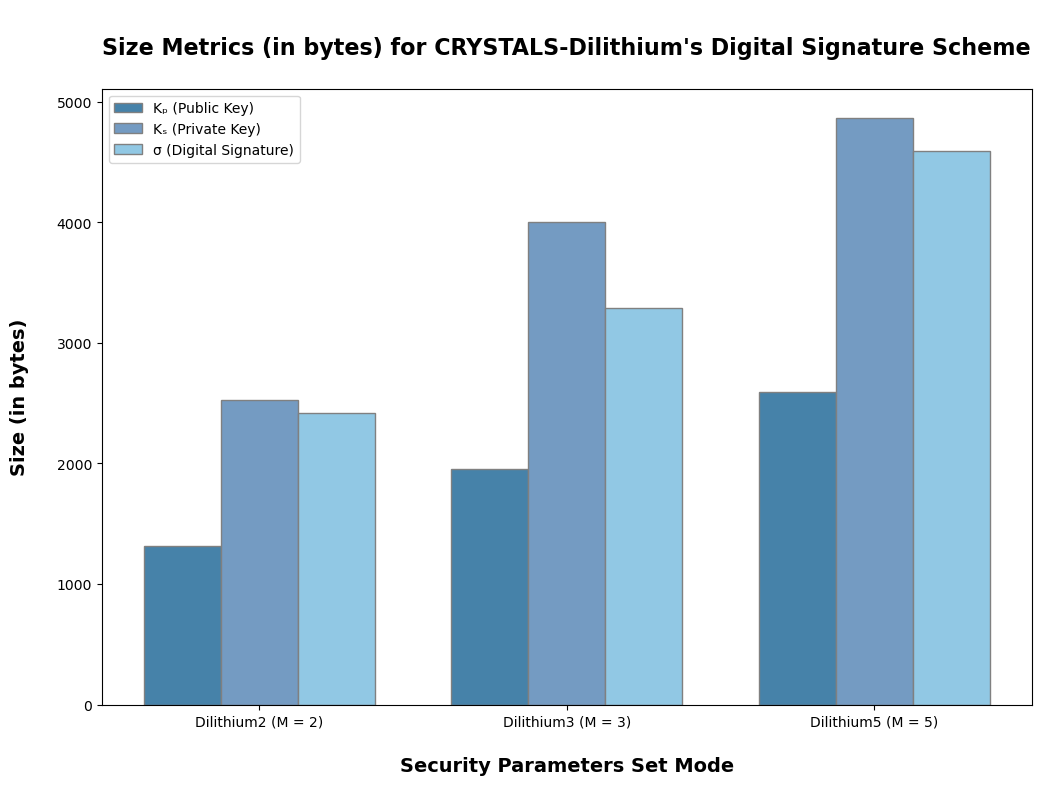

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_pub_keys_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_priv_key_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_dig_sign_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium3 (M = 3)", "Dilithium5 (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.show()

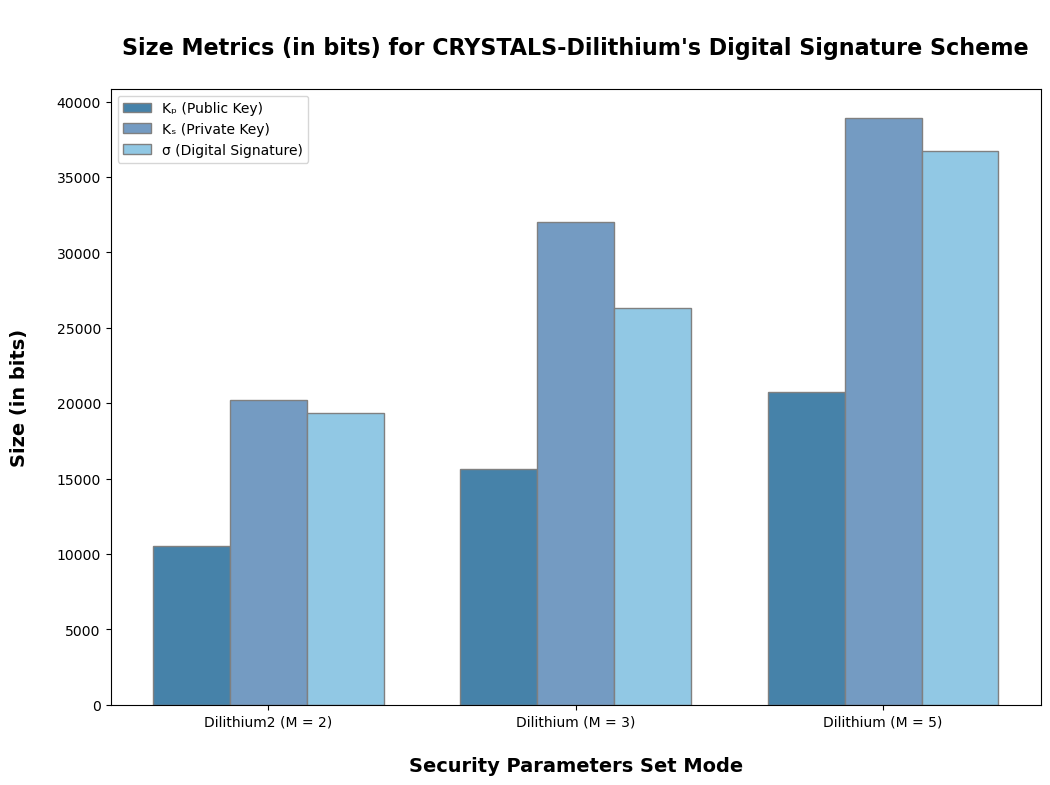

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_pub_keys_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_priv_key_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_dig_sign_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium (M = 3)", "Dilithium (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.show()

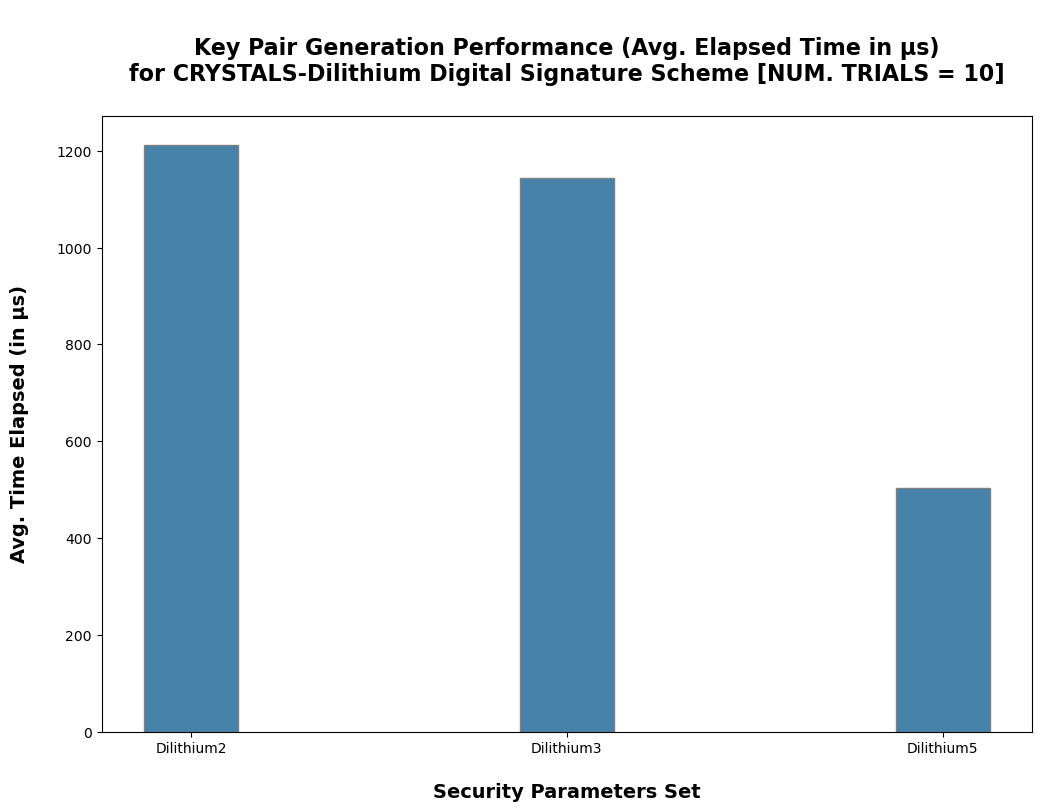

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials
# used to estimate the average times for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_key_pair_generation_performance_metrics = \
    {  "Dilithium2": 1211.917,
       "Dilithium3": 1142.841,
       "Dilithium5": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for
# each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.bar( crystals_dilithium_key_pair_generation_performance_metrics.keys(),
             crystals_dilithium_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Dilithium Digital Signature Scheme [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set Mode
# used by the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each
# Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the EUF-CMA Signing/Verifying<br>using the CRYSTALS-Dilithium Digital Signature Scheme

In [8]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumSigner;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    // Definition of the instance of the Signer entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_signer;
    
    // Definition of the instance of the Verifier entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_verifier;
    
    // Definition of the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of a public key of the digital signature scheme.
    private DilithiumPublicKeyParameters public_key_shared_other_party_payload;
    
    // Definition of the encoding of the cryptographic digital signature
    // package σ generated and exchanged using the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, as a byte array.
    private byte[] cryptographic_digital_signature_package_sigma_encoded_bytes;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
        // Initialization of the instance of the Signer entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.        this.digital_signature_package_sigma_signer = null;

        // Initialization of the instance of the Verifier entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.digital_signature_package_sigma_verifier = null;

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme, as a null object.
        this.public_key_shared_other_party_payload = null;

        // Initialization of the encoding of the cryptographic digital signature
        // package σ generated and exchanged using the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a null object.
        this.cryptographic_digital_signature_package_sigma_encoded_bytes = null;

    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to receive and set the payload of
    // the public key shared by the other party and
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public void receive_and_set_public_key_shared_other_party_payload
        ( byte[] public_key_shared_other_party_encoding_bytes ) {
        
        // Retrieval of the cipher parameters from
        // the key generation parameters to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
            this.get_key_generation_parameters().getParameters();

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme. 
        this.public_key_shared_other_party_payload = 
            new DilithiumPublicKeyParameters
                ( crystals_dilithium_digital_signature_scheme_parameters,
                  public_key_shared_other_party_encoding_bytes );
        
    }
    
    
    // Method to obtain the payload of the public key shared by
    // the other party and to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public DilithiumPublicKeyParameters get_public_key_shared_other_party_payload() {
        
        // Return of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme.
        return this.public_key_shared_other_party_payload;
        
    }
    
    
    // Method to initialize the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_signer() {
       
        // Initialization of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer = new DilithiumSigner();
        
        // Setup of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer
            .init( true, this.get_private_key_payload() );
        
    }
        
    
    // Method to obtain the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_signer() {
       
        // Return of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_signer;
        
    }
    
    
    // Method to initialize the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_verifier() {
       
        // Initialization of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_verifier = new DilithiumSigner();
        
        // Setup of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        this.digital_signature_package_sigma_verifier
            .init( false, this.get_public_key_shared_other_party_payload() );
        
    }
        
    
    // Method to obtain the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_verifier() {
       
        // Return of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_verifier;
        
    }

}

null